# Chicago

This notebooks displays some of the data available at [Business Licenses - Current Active](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q). We assume the data was downloaded.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Data

In [3]:
from pyensae.datasource import download_data
file = download_data("rows.csv", url="https://data.cityofchicago.org/api/views/uupf-x98q/")

## Businesses

In [4]:
import pandas
businesses = df = pandas.read_csv("rows.csv", low_memory=False)
df.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1620668-20160516,2455262,295026,1,BUCCI BIG & TALL INC.,BUCCI BIG & TALL INC.,558 W ROOSEVELT RD,CHICAGO,IL,60607,...,05/16/2016,05/15/2018,05/18/2016,08/30/2016,AAI,NaN,NaN,41.867339,-87.641590,"(41.86733856638269, -87.64159005699716)"
1,2488345-20160830,2488345,409564,1,"BURKS HEATING AND COOLING SOLUTIONS, LLC","BURKS HEATING AND COOLING SOLUTIONS, LLC",5722 S WOOD ST 1ST,CHICAGO,IL,60636,...,08/30/2016,09/15/2018,08/30/2016,08/30/2016,AAI,NaN,NaN,41.789617,-87.669472,"(41.78961679000226, -87.66947199630827)"
2,2279620-20160830,2279620,305598,17,"PREFER VALET PARKING SERVICE, INC.","PREFER VALET PARKING SERVICES, INC.",2812-2840 W 26TH ST GROUND,CHICAGO,IL,60623,...,08/30/2016,03/15/2018,08/30/2016,08/30/2016,AAI,NaN,25.0,41.844792,-87.695742,"(41.84479183618235, -87.69574196647987)"
3,2354707-20160916,2482568,393149,1,ANGELINE R. MC CARTHY,ANGELINE R. MC CARTHY,17707 S HARLEM ST 1,TINLEY PARK,IL,60477,...,09/16/2016,09/15/2018,NaN,08/30/2016,AAI,NaN,NaN,NaN,NaN,NaN
4,2488245-20160830,2488245,336275,2,MARIA G CAHUE,BEAUTY AND HEALTH,2705 W 51ST ST 1ST,CHICAGO,IL,60632,...,08/30/2016,06/15/2017,08/30/2016,08/30/2016,AAI,NaN,NaN,41.800916,-87.691800,"(41.80091646021564, -87.69179951881104)"


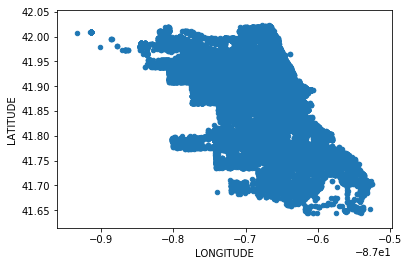

In [5]:
df.plot(x="LONGITUDE", y="LATITUDE", kind="scatter")

In [6]:
minlon, maxlon = df["LONGITUDE"].min(), df["LONGITUDE"].max()
minlat, maxlat = df["LATITUDE"].min(), df["LATITUDE"].max()
minlon, maxlon, minlat, maxlat

(-87.933976504, -87.525094136000007, 41.644670131999995, 42.022660268000003)

c:\python35_x64\lib\site-packages\mpl_toolkits\basemap\__init__.py:1775: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()


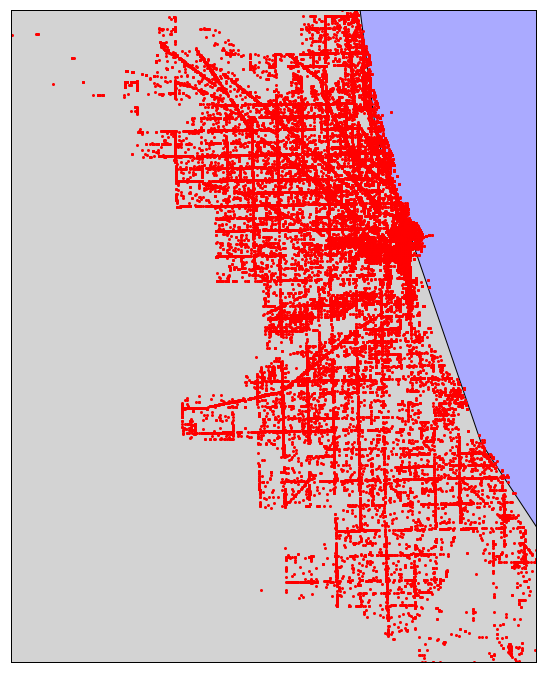

In [7]:
from mpl_toolkits.basemap import Basemap
import numpy
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(16,12))
m = Basemap(llcrnrlon=minlon,llcrnrlat=minlat,urcrnrlon=maxlon,urcrnrlat=maxlat,
            resolution='i',projection='cass',
            lon_0=(minlon + maxlon)/2,lat_0=(minlat+maxlat)/2,
            ax=axes)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='lightgrey', lake_color='#AAAAFF')
m.drawmapboundary(fill_color='#BBBBFF')
xs = []
ys = []
for i in range(0,df.shape[0]):
    x, y = m(df.loc[i,"LONGITUDE"], df.loc[i,"LATITUDE"])
    xs.append(x)
    ys.append(y)
m.plot(xs, ys, 'ro', markersize=2)